# Does Incumbency Advantage Exist In Taiwan's Legislator Elections?
> Exploration through regression discontinuity

- toc: true 
- badges: false
- comments: true
- categories: [jupyter]
- image: images/rd_dpp_legislator.png

# Incumbency advantage

People usually believe the incumbent candidate has a higher winning rate in the re-election. Does the incumbent effect still exist when we extend it to the party level? That is, whether a candidate has a higher winning probability while the seat/office was won by their party last time.

## Measure the incumbency advantage effect: regression discontinuity

To measure the incumbent effect, Lee [^1] proposed a regression discontinuity design on previous election margins. The design studied the observations near the cut-off, margin equals zero in this case, and saw if there was a significant difference in the winning probability between the samples with its previous margin less than zero, says losing last time, and the samples winning last time. Since only the observations with near zero margin are studied and the margin is so small that it probably won just by chance, whether a party won the previous election can be conisdered as almost randomly assigned. Hence, the difference between the two sides is the effect we are curious about. Lee found the incumbency advantage existed in representative elections in US. Does the same incumbent effect can be found in Taiwan's legislator elections?

[^1]: Lee, D. S. (2008). Randomized experiments from non-random selection in US House elections. *Journal of Econometrics*, 142(2), 675-697.

# Taiwan's legislator elections

The legislators are the parliament members at the national level. They can propose general law creation and modification. They also supervise the goverment. The legislators are elected every four year. The candidate

There are 113 seats of legislators in total:

1. **Regional**: 73 seats. Single-member districts.
2. **Party**: 34 seats. Party-list proportional representation voting.
3. **Indigenous**: 6 seats. Single non-transferable voting in multi-member districts, exclusive for persons with indigenous status.

## Two major parties

Most elections in Taiwan are competed by two major parties, KMT and DPP, though there are over one hundred parties regiested and around ten of them are active. KMT is pro-China and relatively consevative while DPP is pro-independent and more progressive.

## The data

The electoral district and method design has been effective since 2008. The previous elections were hold under multiple-member districts so I didn't include them in the data. There are four elections, 2008, 2012, 2016 and 2020, in the data. However, the districts and seats are totally different in 2004 and 2008 because of the electoral district and method change. In this RD design, we need current and previous election results together as a full record. Hence, 2008 result is only used as 2012's last-time result as table below but doesn't appear as current records in the data.

|current|previous|
|-------|--------|
|2012   |2008    |
|2016   |2012    |
|2020   |2016    |

The data of interest looks like this:

In [67]:
#collapse-hide
dt %>%
select(name, year, KMT_elected, DPP_elected, margin_all_KMT_pos_last, margin_all_DPP_pos_last) %>%
head()

name,year,KMT_elected,DPP_elected,margin_all_KMT_pos_last,margin_all_DPP_pos_last
<chr>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>
臺北市第01選區,2020,FALSE,TRUE,-0.07045290,0.0704529
臺北市第02選區,2020,FALSE,TRUE,-0.59290716,0.2286177
臺北市第03選區,2020,TRUE,FALSE,0.08264919,-0.4668305
臺北市第04選區,2020,FALSE,TRUE,0.01868654,-0.4173824
臺北市第05選區,2020,FALSE,FALSE,-0.03937206,-0.4952215
臺北市第06選區,2020,TRUE,FALSE,0.10743024,-0.4609803


The margin is relative to the winner or the second place from a party's view. Let's take KMT for instance. 

- **If KMT won the seat**

```
KMT's margin = KMT's share - the second place candidate's share
```

- **If KMT lose the seat or didn't nominate a candidate**

```
KMT's margin = the winner's share - KMT's share
```

If KMT didn't nominate a candidate in the district, the KMT's share is assigned to 0.



## KMT's view

Let's start from KMT. The distribution of 188 records are show as below. Most winning candidates were in a electoral district KMT won last time.

In [26]:
#hide
options(warn=0)
library("tidyverse")
library("rdrobust")
library("scales")
dt <- readr::read_csv("legislatorRD4R.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  name = col_character(),
  DPP_elected = col_logical(),
  KMT_elected = col_logical(),
  DPP_elected_last = col_logical(),
  KMT_elected_last = col_logical()
)

See spec(...) for full column specifications.



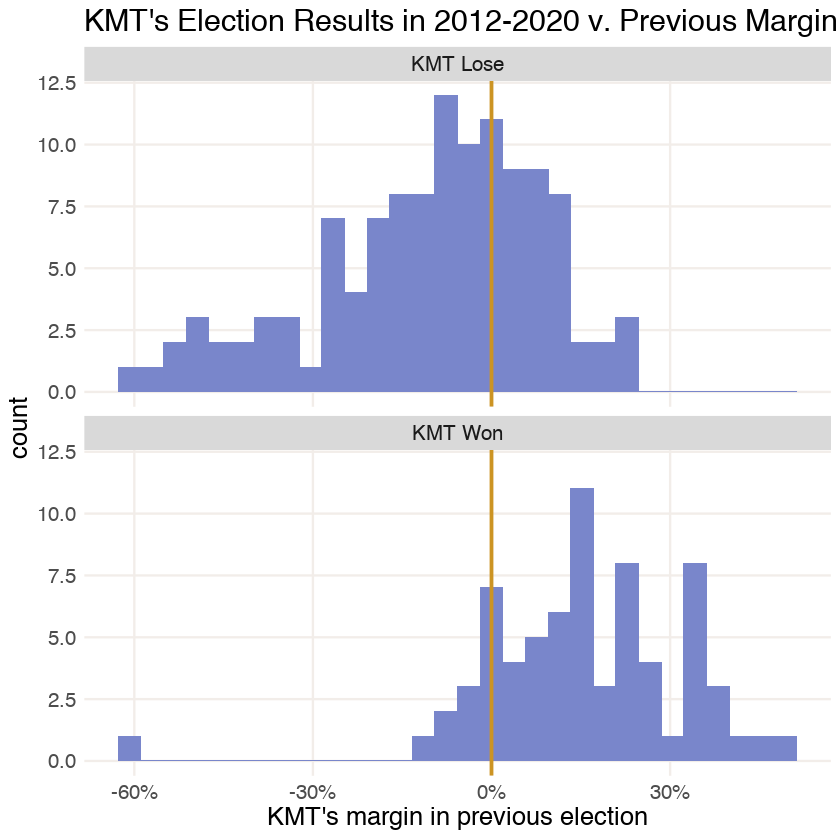

In [59]:
#collapse-hide
dt %>%
filter(!is.na(margin_all_KMT_pos_last)) %>%
mutate(KMT_elected = ifelse(KMT_elected == TRUE, "KMT Won", "KMT Lose")) %>%
ggplot() +
geom_histogram(aes(x = margin_all_KMT_pos_last), fill = "#7986CB", bins = 30) +
geom_vline(xintercept = 0, color = "#CC9423", size = 0.8) +
scale_x_continuous(labels = scales::percent) +
labs(x = "KMT's margin in previous election",
    title = "KMT's Election Results in 2012-2020 v. Previous Margin") +
facet_wrap(~KMT_elected, nrow = 2) +
theme(text = element_text(size = 15),
      axis.ticks = element_blank(),
      panel.background = element_rect(fill = NA),
      panel.grid.major = element_line(colour = "#F2EDE9"),
      panel.grid.minor = element_blank())

### RD Plot

To check its regression discontinuity, the data has to be aggregated into groups and calculated their average winning rate. I grouped the data into quantile-spaced (QS) bins.[^2] QS makes sure every group containing equal number of records and helps us to observe data's distribution on the plot as well. As we can see on the plot below, previous margins locate a lot between -15% ~ 15%. The regression line has a steep slope on the side of KMT won the previous election. The difference of winning rate is 20%. That means running as the incumbent is associated with a 20 percent point advantage for KMT's candidates.

[^2]: Cattaneo, M. D., Idrobo, N., & Titiunik, R. (2019). *A Practical Introduction to Regression Discontinuity Designs: Foundations.* Cambridge University Press. 23-25.

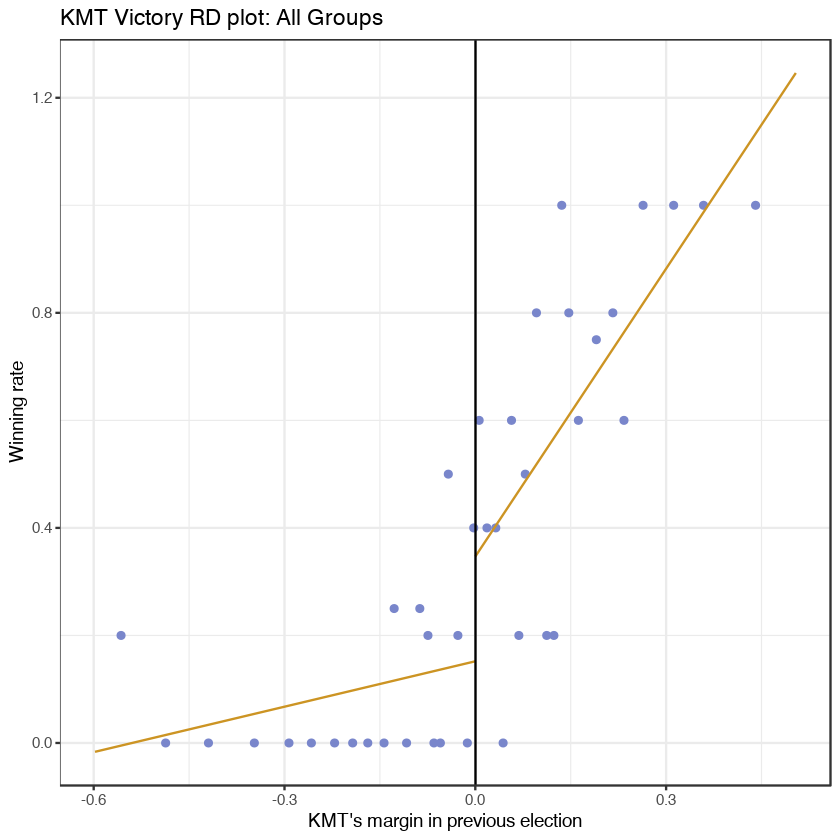

In [68]:
#collapse-hide
Y <- dt$KMT_elected
X <- dt$margin_all_KMT_pos_last
out <- rdplot(Y, X, nbins = c(20, 20), binselect = "qs", p = 1, 
              col.dots = "#7986CB",
              col.lines = "#CC9423",
              title = "KMT Victory RD plot: All Groups", 
              x.label = "KMT's margin in previous election",
              y.label = "Winning rate")

## DPP's view

In contrast to KMT, DPP lose most seats it didn't win last time.

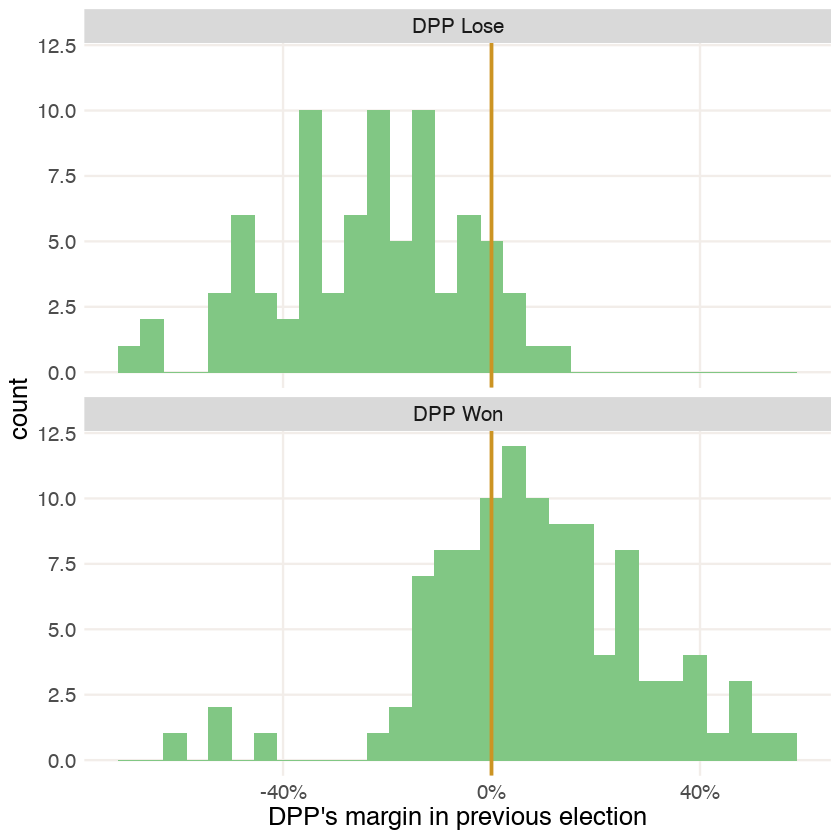

In [58]:
#collapse-hide
dt %>%
filter(!is.na(margin_all_DPP_pos_last)) %>%
mutate(DPP_elected = ifelse(DPP_elected == TRUE, "DPP Won", "DPP Lose")) %>%
ggplot() +
geom_histogram(aes(x = margin_all_DPP_pos_last), fill = "#81C784", bins = 30) +
geom_vline(xintercept = 0, color = "#CC9423", size = 0.8) +
scale_x_continuous(labels = scales::percent) +
labs(x = "DPP's margin in previous election",
     title = "DPP's Election Results in 2012-2020 v. Previous Margin") +
facet_wrap(~DPP_elected, nrow = 2) +
theme(text = element_text(size = 15),
      axis.ticks = element_blank(),
      panel.background = element_rect(fill = NA),
      panel.grid.major = element_line(colour = "#F2EDE9"),
      panel.grid.minor = element_blank())

### RD plot

Although the slopes of two sides look more similiar than the ones on KMT's plot, the difference of two sides' intercepts is larger. It shows a >30% jump between winning and losing the seat. The effect is more obvious for DPP than for KMT.

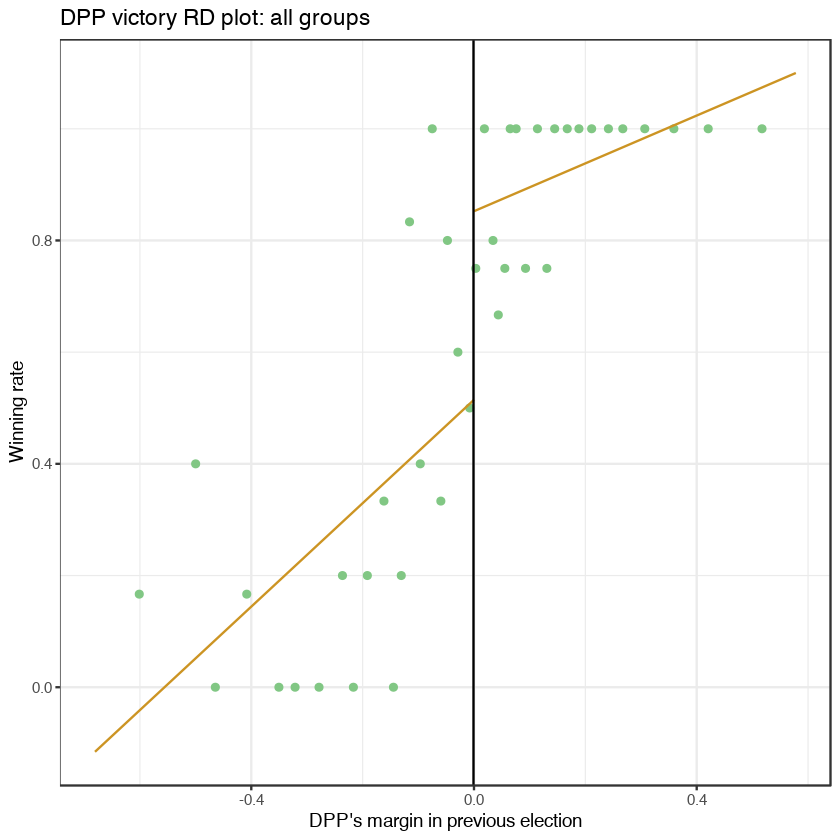

In [70]:
#collapse-hide
Y <- dt$DPP_elected
X <- dt$margin_all_DPP_pos_last
out <- rdplot(Y, X, nbins = c(20, 20), binselect = "qs", p = 1, 
              title = "DPP victory RD plot: all groups",
              col.dots = "#81C784",
              col.lines = "#CC9423",
              x.label = "DPP's margin in previous election",
              y.label = "Winning rate")

# Not enough data

Though the plots above seem promising, it is premature to conclude that incumbency advantage exists in Taiwan's recent legislator elections. The plots were based on all 188 data points available from recent elections. However, the RD design is most sound for local groups around the cut-off, and we do not have enough data points there. For example, if I choose data points with margins between `[-20% , 20%]` from DPP's view, as plotted below, only two groups would be left on the right hand side. We shouldn't rush to draw conclusions from a trend line with only two points; further rounds of election results would pave the way to more robust analyses.

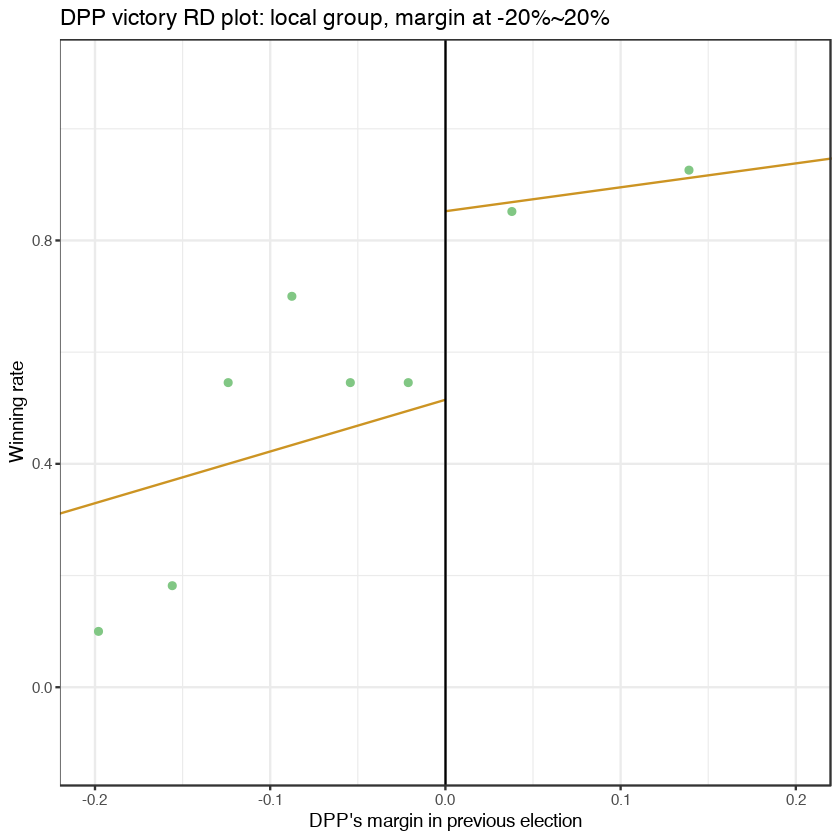

In [72]:
#collapse-hide
out <- rdplot(Y, X, x.lim = c(-0.2, 0.2), binselect = "qs", p = 1, 
              title = "DPP victory RD plot: local group, margin at -20%~20%",
              col.dots = "#81C784",
              col.lines = "#CC9423",
              x.label = "DPP's margin in previous election",
              y.label = "Winning rate")